## Obliczanie optymalnego kąta nachylenia kolektora słonecznego

Przy projektowaniu i analizie funkcjonowania słonecznych instalacji służących do podgrzewania wody użytkowej oraz instalacji grzewczych zachodzi konieczność obliczenia natężenia promieniowania na powierzchni czołowej kolektora słonecznego zainstalowanego pod określonym kątem $\beta$ oraz w odniesieniu względem osi północ-południe $\gamma$.

Do obliczeń są niezbędne dane dotyczące natężenia promieniowania słonecznego dla każdego dnia roku. Mogą to być np.  wygenerowane losowo dane z programu SolarSym (http://fluid.itcmp.pwr.wroc.pl/~kasper/solarsym/).

In [1]:
# wyciszenie komunikatów o błędach
import warnings;warnings.simplefilter('ignore')

# załadowanie modułów
%pylab inline
%config InlineBackend.figure_format = 'retina'
rcParams['savefig.dpi'] = 120

import math
import operator

Populating the interactive namespace from numpy and matplotlib


### Szerokość geograficzna oraz orientacja

* Szerokość geograficzna $\phi = 51.10$ stopni została przyjęta dla Wrocławia (podobnie jak zestaw danych)
* Kolektora zorientowany jest idealnie w osi północ-południe $\gamma = 0$ 

In [2]:
ϕ = math.radians(51.10) # [°]
γ = 0 # [°]

* Dzień roku (do obliczenia deklinacji)
* Różnica w minutach pomiędzy godziną 12:00, a godziną w której zarejestrowana maksymalne natężenie. Wartość ujemna oznacza, że wskazówka wychylona jest w lewo, przykładowo: godzina **11:50 = -10 minut**.

In [3]:
n = 180 # numer dnia
minuty = -10

### Deklinacja słońca dla wskazanego dnia

Deklinacja jest to długość łuku chwilowego koła godzinnego Słońca zawartego pomiędzy płaszczyzną równika niebieskiego a Słońcem. Deklinacja dowolnego punktu sfery niebieskiej przyjmuje wartości od 0° (na równiku niebieskim), do +/-90° ("+" na N od równika i "-" na S od równika). Maksymalna wartość deklinacji Słońca (w momentach przesileń) wynosi obecnie +/-23°26,4'. Deklinację oblicza się wg nastepującego równania:

$$\delta = 23.45 \cdot \rm{sin}\left( 360 \cdot \left( \frac{284 + n}{365} \right)\right)$$

In [4]:
δ = math.radians(23.45 * sin(math.radians(360 * (284 + n)/365)))

print ('Deklinacja słońca: %.2f°' % math.degrees(δ))

Deklinacja słońca: 23.24°


### Kąt godzinowy $\omega$

In [5]:
ω = math.radians(15 * (minuty / 60.))
print ('Kąt godzinowy: %.2f°' % math.degrees(ω))

Kąt godzinowy: -2.50°


### Obliczanie kąta nachylenia kolektora $\beta$
Celem jest ustalenie takiego kąta nachylenia kolektora $\beta$ aby promienie słońca padały na niego w sposób optymalny, tj. mozliwie zbliżony do kierunku normalnego do jego powierzchni.

#### Definicje funkcji do obliczeń $\rm{cos}\left(\theta_{\beta}\right)$ oraz kąta $\theta_{\beta}$

Zależność opisująca $\rm{cos}\left(\theta_{\beta}\right)$ w funkcji kątów $\beta$ i $\gamma$ oraz szerokości geograficznej $\phi$, deklinacji słońca $\delta$ i kąta godzinnego $\omega$.

$$\rm{cos}\theta_{\beta} = \rm{sin}\left(\delta\right) \rm{sin}\left(\phi\right) \rm{cos}\left(\beta\right) - \rm{sin}\left(\delta\right) \rm{cos}\left(\phi\right) \rm{sin}\left(\beta\right) \rm{cos}\left(\gamma\right) + \rm{cos}\left(\delta\right) \rm{cos}\left(\phi\right) \rm{cos}\left(\beta\right) \rm{cos}\left(\omega\right) + \\ + \rm{cos}\left(\delta\right) \rm{sin}\left(\phi\right) \rm{sin}\left(\beta\right) \rm{cos}\left(\gamma\right) + \rm{cos}\left(\delta\right) \rm{sin}\left(\beta\right) \rm{sin}\left(\gamma\right) \rm{sin}\left(\omega\right)$$

In [6]:
def CTB(aphi, adelta, agamma, abeta, aomega):
    a1 = math.sin(adelta)*math.sin(aphi)*math.cos(abeta) 
    a2 = - math.sin(adelta)*math.cos(aphi)*math.sin(abeta)*math.cos(agamma) 
    a3 = math.cos(adelta)*math.cos(aphi)*math.cos(abeta)*math.cos(aomega) 
    a4 = math.cos(adelta)*math.sin(aphi)*math.sin(abeta)*math.cos(agamma)*math.cos(aomega)
    a5 = math.cos(adelta)*math.sin(abeta)*math.sin(agamma)*math.sin(aomega)
    return a1+a2+a3+a4+a5

def TB(ctb):
    return math.degrees(math.acos(ctb))

### Wyznaczenie optymalnego kąta nachylenia kolektora $\beta$ w zakresie 0 do 90 stopni.

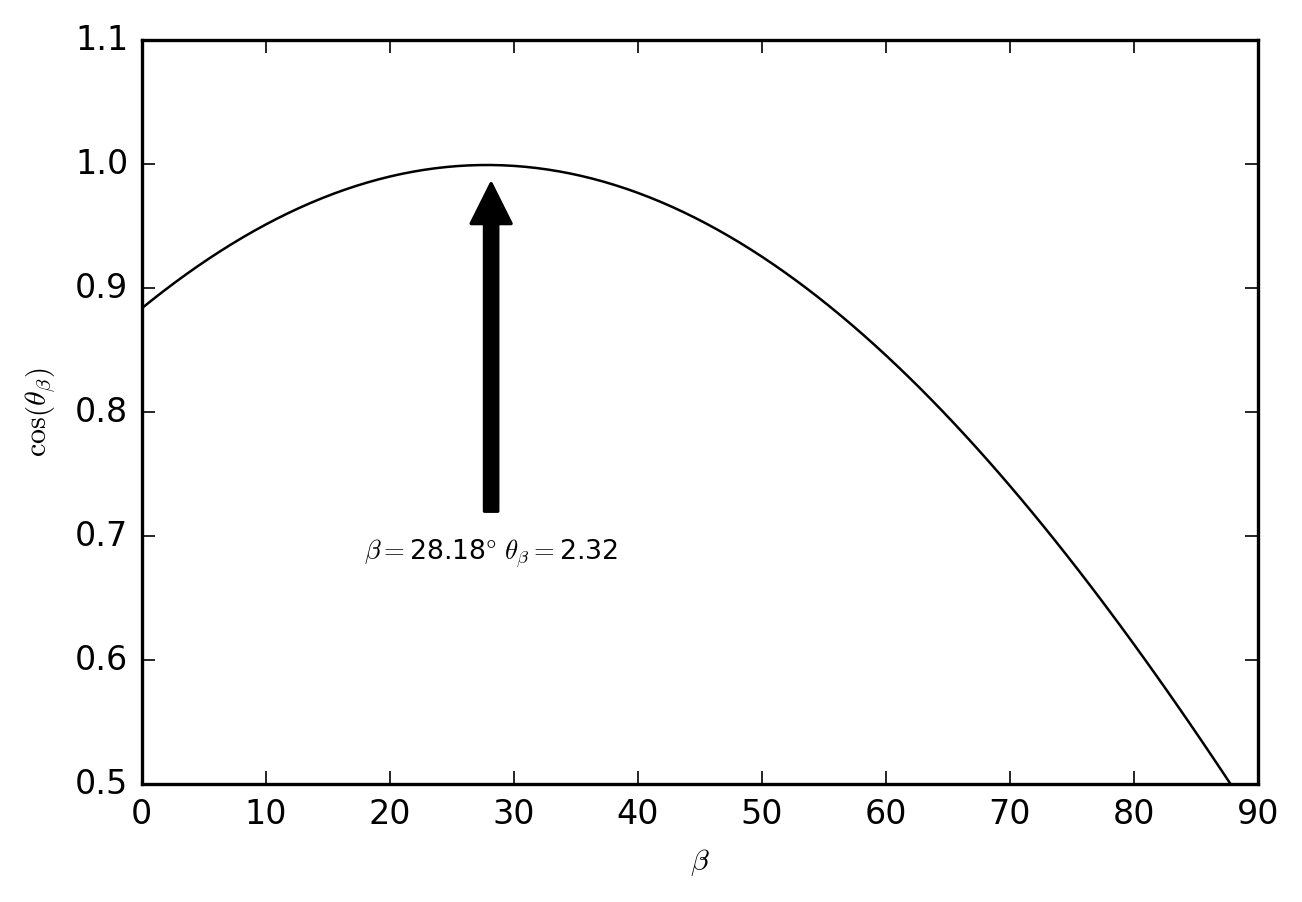

In [7]:
# Definicja tablic
abetaD = np.linspace(0,90,100) # ... beta[] jest tylko po to aby wyświetlić na osi x wartości w stopniach
cos_TB = np.linspace(0,90,100) # ... tablica wyników

abetaR = np.linspace(0,90,100) # ... do obliczeń należy użyć tablicy wartości w radianach

# Obliczenie cos(θ_β)
x = 0
for (i) in abetaR:
    abetaR[x] = math.radians(i) # ... przeliczanie stopni na radiany
    cos_TB[x] = CTB(ϕ,δ,γ,abetaR[x],ω) # obliczanie wartości cos_theta_beta
    x += 1

# Poszukiwanie wartości maksymalnej cos(θ_β)
max_index, max_value = max(enumerate(cos_TB), key=operator.itemgetter(1))

# Optymalna wartość kąta β
β = math.radians(abetaD[max_index])
θ_β = math.acos(cos_TB[max_index])

# Wizualizacja graficzna wyniku obliczeń
plt.figure()
plt.plot(abetaD, cos_TB, 'k-', linewidth=0.75, ms=4, fillstyle='none',label="Prim. chiller")
plt.ylabel(r'$\rm{cos} \left( \theta_{\beta} \right)$',fontsize=9)
plt.xlabel(r'$\beta$',fontsize=9)
plt.annotate(r'$\beta = $' + str(round(abetaD[max_index],2)) + 
             r'$\degree$ $\theta_{\beta} = $' +str(round(math.degrees(math.acos(cos_TB[max_index])),2)), 
             xy=(abetaD[max_index],cos_TB[max_index]), xytext=(abetaD[max_index], cos_TB[max_index]-0.3),
             arrowprops=dict(facecolor='black', shrink=0.05), horizontalalignment='center', 
             verticalalignment='top', fontsize=8)
plt.ylim(0.5,1.1);